In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("C:\\Users\\rabia\\Desktop\\Artificial Intelligence in Healthcare Group Project\\cleaned_data_final.csv")

In [7]:
df = df1.drop(columns=['Unnamed: 0'])
df.head()

,user_id,Fairly_Active(mins),Lightly_Active(mins),Sedentary(mins),Very_Active(mins),BMI,Calories,Distance,Efficiency,Steps,RHR,GAD-7,PHQ-8,Covid_Status
0,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.055556,171.300000,760.352941,11.833333,22.624415,2619.666667,4.232667,94.476190,5371.411765,54.000000,9.00000,17.000000,0
1,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.400000,136.133333,757.866667,6.866667,22.672380,2369.466667,2.704683,92.684211,3309.600000,55.066667,7.00000,14.500000,1
2,01dWPpgq7Nenmdej73ONXdNDjaH2,28.812500,166.117647,760.687500,44.625000,30.992470,3054.000000,8.072777,40.285714,9942.200000,61.611111,5.72834,7.474878,0
3,01dWPpgq7Nenmdej73ONXdNDjaH2,14.000000,100.666667,786.666667,25.733333,33.001465,2712.266667,3.815629,54.636364,5355.733333,58.800000,0.12500,0.111111,1
4,03PCkZSgsRg3lgPAu37srPG1VGG3,67.866667,335.785714,488.600000,16.933333,28.613124,3224.600000,10.484668,88.722222,14137.600000,73.846154,5.72834,7.474878,0


In [8]:
df['Covid_Status'].unique()

array([0, 1], dtype=int64)

In [15]:
y = df['Covid_Status']
X = df.drop(['Covid_Status','user_id'], axis=1)

# Testing

In [16]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=2, 
                             max_depth=3,
                             random_state=SEED)

In [24]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

# Training Set

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)


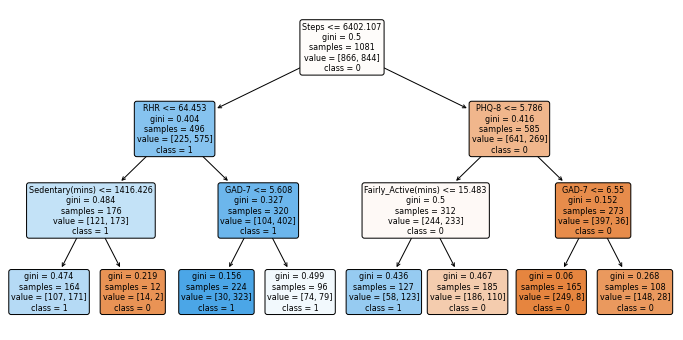

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1273642419)


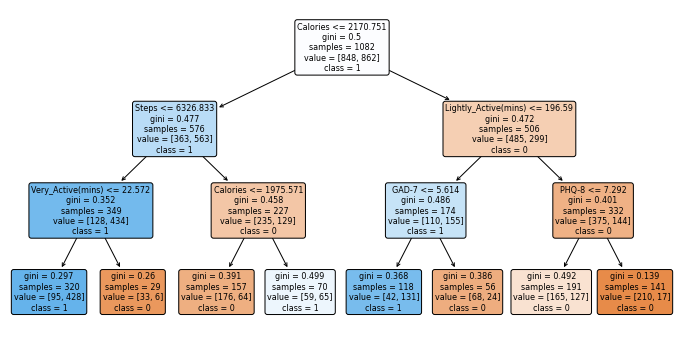

In [25]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1'] # The name of each class
# classes = ['non-covid', 'covid']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       234
           1       0.82      0.82      0.82       194

    accuracy                           0.84       428
   macro avg       0.84      0.84      0.84       428
weighted avg       0.84      0.84      0.84       428



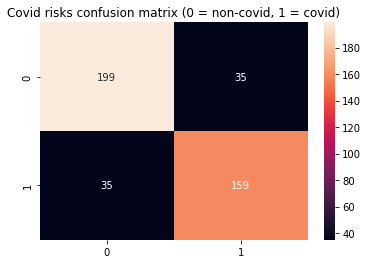

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Covid risks confusion matrix (0 = non-covid, 1 = covid)')

print(classification_report(y_test,y_pred))

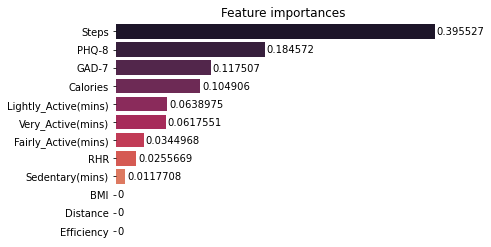

In [28]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [29]:
rfc_ = RandomForestClassifier(n_estimators=900, 
                             max_depth=7,
                             random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       234
           1       0.82      0.82      0.82       194

    accuracy                           0.84       428
   macro avg       0.84      0.84      0.84       428
weighted avg       0.84      0.84      0.84       428



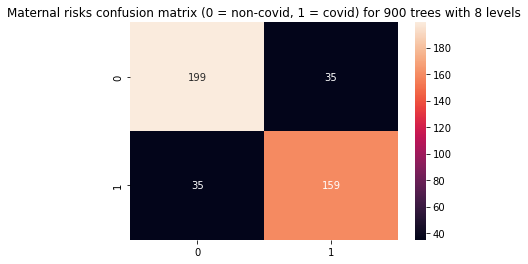

In [32]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = non-covid, 1 = covid) for 900 trees with 8 levels')

print(classification_report(y_test,y_pred))